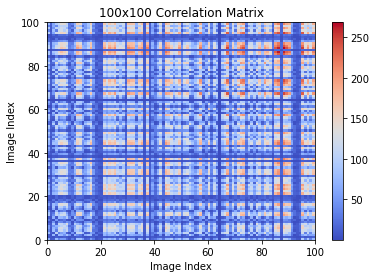

In [21]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
results=loadmat('yalefaces.mat')
X=results['X']

X100 = X[:, :100]
dot_prod = np.dot(X100.T, X100)

fig, ax = plt.subplots()
pcm = ax.pcolor(dot_prod, cmap='coolwarm')
fig.colorbar(pcm, ax=ax)
ax.set_xlabel('Image Index')
ax.set_ylabel('Image Index')
ax.set_title('100x100 Correlation Matrix')
plt.show()

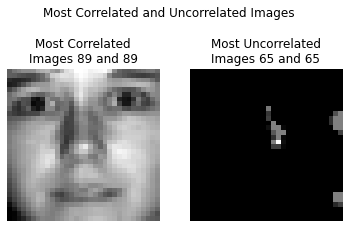

In [67]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
results=loadmat('yalefaces.mat')
X=results['X']

X100 = X[:, :100]
dot_prod = np.dot(X100.T, X100)

idx_max = np.unravel_index(np.argmax(dot_prod), dot_prod.shape)
idx_min = np.unravel_index(np.argmin(dot_prod), dot_prod.shape)

plt.subplot(1, 2, 1)
plt.imshow(X[:, idx_max[0]].reshape(32, 32), cmap='gray')
plt.title(f'Most Correlated\nImages {idx_max[0]+1} and {idx_max[1]+1}')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X[:, idx_min[0]].reshape(32, 32), cmap='gray')
plt.title(f'Most Uncorrelated\nImages {idx_min[0]+1} and {idx_min[1]+1}')
plt.axis('off')
plt.suptitle('Most Correlated and Uncorrelated Images')
plt.show()

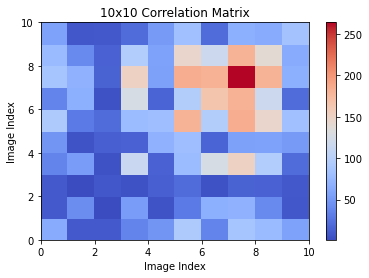

In [40]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

results=loadmat('yalefaces.mat')
X=results['X']

data = np.array([0, 312, 511, 4, 2399, 111, 1022, 86, 313, 2004])

X10 = X[:, data]
corr_matrix = np.dot(X10.T, X10)

fig, ax = plt.subplots()
pcm = ax.pcolor(corr_matrix, cmap='coolwarm')
fig.colorbar(pcm, ax=ax)
ax.set_xlabel('Image Index')
ax.set_ylabel('Image Index')
ax.set_title('10x10 Correlation Matrix')
plt.show()

In [52]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

results=loadmat('yalefaces.mat')
X=results['X']

dot = np.dot(X, X.T)

eigval, eigvec = np.linalg.eig(dot)
index = np.argsort(eigval)[::-1]
eigvec = eigvec[:, index]
eigvec = np.dot(X.T, eigvec)
eigvec = eigvec / np.linalg.norm(eigvec, axis = 0)

print("Largest eigenvectors of the Matrix:")
print (eigvec)
u, s, v = np.linalg.svd(X)
v = v.T

print("Principal components:")
print(v)

difference = np.abs(eigvec[:,0]) - np.abs(v[:, 0])
norm_diff = np.linalg.norm(difference)
print("Norm of difference:")
print(norm_diff)

Largest eigenvectors of the Matrix:
[[ 0.01219331 -0.01938848  0.01691206 ... -0.00966989  0.00971287
  -0.00564279]
 [ 0.00215188 -0.00195186  0.00143586 ... -0.00433712  0.01228929
  -0.01807483]
 [ 0.01056679  0.02471869  0.0384465  ...  0.02115437 -0.00612501
  -0.0438849 ]
 ...
 [ 0.02177117  0.04027773  0.01340245 ...  0.00707587 -0.01181226
  -0.00289789]
 [ 0.03015309  0.00219562 -0.01883373 ... -0.01314592 -0.02117887
  -0.02584959]
 [ 0.0257889   0.01553129  0.00643709 ...  0.00058608  0.01668879
  -0.00668837]]
Principal components:
[[-1.21933140e-02 -1.93884843e-02  1.69120616e-02 ... -4.68913401e-02
  -2.15169376e-02 -1.49564373e-02]
 [-2.15187961e-03 -1.95186188e-03  1.43586175e-03 ... -6.57961576e-03
  -1.64254415e-02 -1.94319665e-02]
 [-1.05667884e-02  2.47186920e-02  3.84465025e-02 ... -4.39952329e-02
   3.45461204e-02  2.78361328e-03]
 ...
 [-2.17711728e-02  4.02777260e-02  1.34024496e-02 ...  5.42357426e-01
  -3.96721935e-02  7.08348111e-04]
 [-3.01530894e-02  2.1956

Percentage of variance by first 6 SVD modes
SVD mode 1: 72.93%
SVD mode 2: 15.28%
SVD mode 3: 2.57%
SVD mode 4: 1.88%
SVD mode 5: 0.64%
SVD mode 6: 0.59%


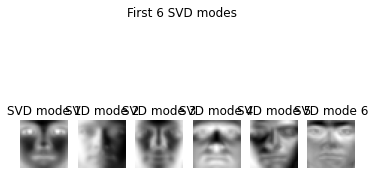

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


results=loadmat('yalefaces.mat')
X=results['X']

u, s, v = np.linalg.svd(X)

var = (s[:6] ** 2) / (np.sum(s ** 2)) * 100

print('Percentage of variance by first 6 SVD modes')
for i in range(6):
    print(f'SVD mode {i+1}: {var[i]:.2f}%')
    
SVD = u[:, :6].reshape(32, 32, 6)
    
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(SVD[:, :, i], cmap='gray')
    plt.title(f'SVD mode {i+1}')
    plt.axis('off')
plt.suptitle('First 6 SVD modes')
plt.show()